In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics  

In [53]:
df = pd.read_csv('../data/processed/Top15diseases_encode_label.csv')

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
class_counts = df["Disease"].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_2332\3389420340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")


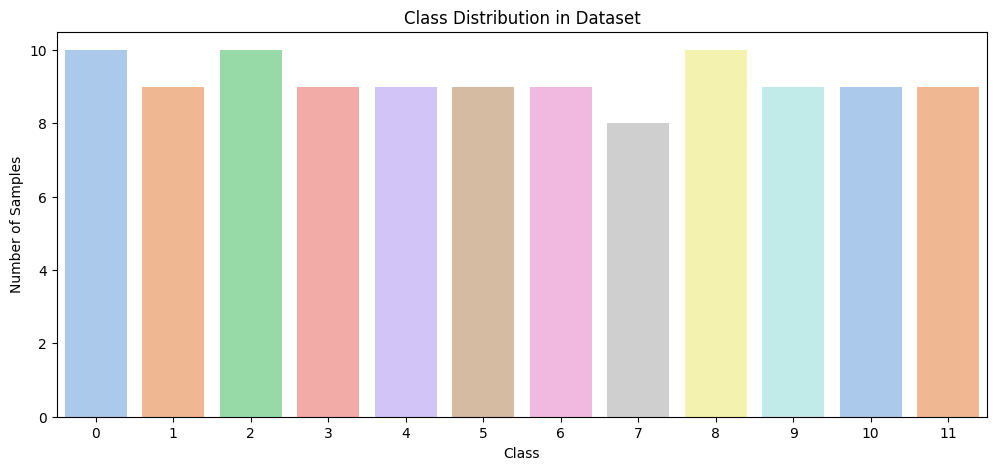

In [56]:
# Plot class imbalance
plt.figure(figsize=(12,5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")

# Add labels
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Dataset")
plt.show()  

In [57]:
X = df.drop(columns=["Disease"])
y = df["Disease"] 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [59]:
test_df = pd.DataFrame(X_test, columns=X.columns) 
test_df["Disease"] = y_test

In [60]:
smote = SMOTE(k_neighbors=2, random_state=42, sampling_strategy='not minority')
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [61]:
balanced_class_counts = pd.Series(y_train_balanced).value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_2332\2797663762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanced_class_counts.index, y=balanced_class_counts.values, palette="pastel")


Text(0.5, 1.0, 'Balanced Class Distribution (After SMOTE)')

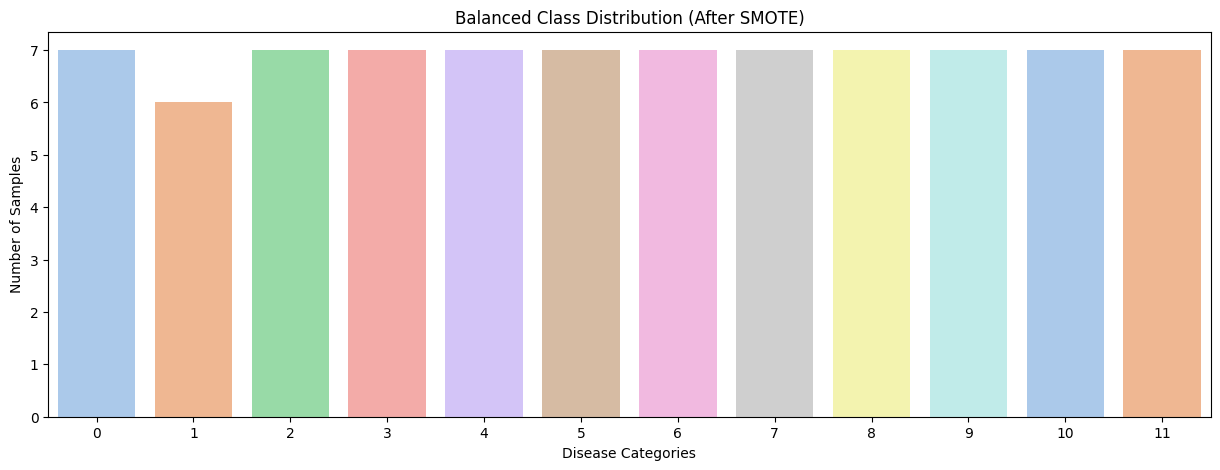

In [62]:
# Plot balanced class distribution
plt.figure(figsize=(15,5))
sns.barplot(x=balanced_class_counts.index, y=balanced_class_counts.values, palette="pastel")

# Add labels
plt.xlabel("Disease Categories")
plt.ylabel("Number of Samples")
plt.title("Balanced Class Distribution (After SMOTE)")



In [63]:
classifier = RandomForestClassifier(random_state=42)

In [64]:
classifier.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9696969696969697
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       0.75      1.00      0.86         3
          11       1.00      0.67      0.80         3

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.98      0.97      0.97        33



In [67]:
import joblib
joblib.dump(classifier, "../src/models/my_random_forest.joblib")

['../src/models/my_random_forest.joblib']